In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
import matplotlib.ticker as mtick

In [27]:
#upload data - 2019 College Scorecard. 
df = pd.read_csv('~/Dropbox (Business)/Spring 2021/QMSS 5063 - Data Visualization /Group_G_HigherEd/data/MERGED2018_19_PP.csv')

/Users/ConnieXu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
#upload data - community college list 
df2 = pd.read_csv('~/Dropbox (Business)/Spring 2021/QMSS 5063 - Data Visualization /Group_G_HigherEd/data/community_college_list.csv')


In [4]:
#removal of for profit universities 
df = df[df['CONTROL']!=3]

In [9]:
#only data 
pd.set_option('display.max_columns', 200)
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,...,BBRR2_FED_UGNOCOMP_MAKEPROG,BBRR2_FED_UGNOCOMP_PAIDINFULL,BBRR2_FED_UGNOCOMP_DISCHARGE,BBRR2_FED_UGUNK_N,BBRR2_FED_UGUNK_DFLT,BBRR2_FED_UGUNK_DLNQ,BBRR2_FED_UGUNK_FBR,BBRR2_FED_UGUNK_DFR,BBRR2_FED_UGUNK_NOPROG,BBRR2_FED_UGUNK_MAKEPROG,BBRR2_FED_UGUNK_PAIDINFULL,BBRR2_FED_UGUNK_DISCHARGE,BBRR2_FED_GR_N,BBRR2_FED_GR_DFLT,BBRR2_FED_GR_DLNQ,BBRR2_FED_GR_FBR,BBRR2_FED_GR_DFR,BBRR2_FED_GR_NOPROG,BBRR2_FED_GR_MAKEPROG,BBRR2_FED_GR_PAIDINFULL,BBRR2_FED_GR_DISCHARGE,BBRR2_FED_GRCOMP_N,BBRR2_FED_GRCOMP_DFLT,BBRR2_FED_GRCOMP_DLNQ,BBRR2_FED_GRCOMP_FBR,BBRR2_FED_GRCOMP_DFR,BBRR2_FED_GRCOMP_NOPROG,BBRR2_FED_GRCOMP_MAKEPROG,BBRR2_FED_GRCOMP_PAIDINFULL,BBRR2_FED_GRCOMP_DISCHARGE,BBRR2_FED_GRNOCOMP_N,BBRR2_FED_GRNOCOMP_DFLT,BBRR2_FED_GRNOCOMP_DLNQ,BBRR2_FED_GRNOCOMP_FBR,BBRR2_FED_GRNOCOMP_DFR,BBRR2_FED_GRNOCOMP_NOPROG,BBRR2_FED_GRNOCOMP_MAKEPROG,BBRR2_FED_GRNOCOMP_PAIDINFULL,BBRR2_FED_GRNOCOMP_DISCHARGE,BBRR2_PP_UG_N,BBRR2_PP_UG_DFLT,BBRR2_PP_UG_DLNQ,BBRR2_PP_UG_FBR,BBRR2_PP_UG_DFR,BBRR2_PP_UG_NOPROG,BBRR2_PP_UG_MAKEPROG,BBRR2_PP_UG_PAIDINFULL,BBRR2_PP_UG_DISCHARGE,BBRR2_PP_UGCOMP_N,BBRR2_PP_UGCOMP_DFLT,BBRR2_PP_UGCOMP_DLNQ,BBRR2_PP_UGCOMP_FBR,BBRR2_PP_UGCOMP_DFR,BBRR2_PP_UGCOMP_NOPROG,BBRR2_PP_UGCOMP_MAKEPROG,BBRR2_PP_UGCOMP_PAIDINFULL,BBRR2_PP_UGCOMP_DISCHARGE,BBRR2_PP_UGNOCOMP_N,BBRR2_PP_UGNOCOMP_DFLT,BBRR2_PP_UGNOCOMP_DLNQ,BBRR2_PP_UGNOCOMP_FBR,BBRR2_PP_UGNOCOMP_DFR,BBRR2_PP_UGNOCOMP_NOPROG,BBRR2_PP_UGNOCOMP_MAKEPROG,BBRR2_PP_UGNOCOMP_PAIDINFULL,BBRR2_PP_UGNOCOMP_DISCHARGE,BBRR2_PP_UGUNK_N,BBRR2_PP_UGUNK_DFLT,BBRR2_PP_UGUNK_DLNQ,BBRR2_PP_UGUNK_FBR,BBRR2_PP_UGUNK_DFR,BBRR2_PP_UGUNK_NOPROG,BBRR2_PP_UGUNK_MAKEPROG,BBRR2_PP_UGUNK_PAIDINFULL,BBRR2_PP_UGUNK_DISCHARGE,BBRR2_FED_UG_N_SUPP,BBRR2_FED_UG_DFLT_SUPP,BBRR2_FED_UG_DLNQ_SUPP,BBRR2_FED_UG_FBR_SUPP,BBRR2_FED_UG_DFR_SUPP,BBRR2_FED_UG_NOPROG_SUPP,BBRR2_FED_UG_MAKEPROG_SUPP,BBRR2_FED_UG_PAIDINFULL_SUPP,BBRR2_FED_UG_DISCHARGE_SUPP,BBRR2_FED_UGCOMP_N_SUPP,BBRR2_FED_UGCOMP_DFLT_SUPP,BBRR2_FED_UGCOMP_DLNQ_SUPP,BBRR2_FED_UGCOMP_FBR_SUPP,BBRR2_FED_UGCOMP_DFR_SUPP,BBRR2_FED_UGCOMP_NOPROG_SUPP,BBRR2_FED_UGCOMP_MAKEPROG_SUPP,BBRR2_FED_UGCOMP_PAIDINFULL_SUPP,BBRR2_FED_UGCOMP_DISCHARGE_SUPP,LPSTAFFORD_CNT,LPSTAFFORD_AMT,LPPPLUS_CNT,LPPPLUS_AMT,LPGPLUS_CNT,LPGPLUS_AMT,FEDSCHCD
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,NaN,0,1,1,3,4,1,1,5,12.0,NaN,34.783368,-86.568502,18.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8986,0.8986,430.0,520.0,420.0,510.0,NaN,NaN,475.0,465.0,NaN,16.0,19.0,14.0,20.0,15.0,18.0,NaN,NaN,18.0,17.0,17.0,NaN,957.0,957.0,0.0394,0.0237,0.0039,0.0000,0.0000,0.0394,0.0592,0.0,0.0710,0.1183,0.0197,0.000,0.0394,0.0,0.0158,0.0473,0.0,0.0927,0.0059,0.0,0.0000,0.0020,0.0000,0.0000,0.0355,0.0000,0.0631,0.0572,0.0493,0.0355,0.0,0.0,0.0,0.0,0.0237,0.0000,0.1578,0.0000,0.0,...,0.02744886975242,0.005382131324,PrivacySuppressed,267,0.17228464419475,PrivacySuppressed,0.30711610486891,0.17602996254681,0.25093632958801,0.04494382022471,PrivacySuppressed,PrivacySuppressed,856,0.05140186915887,0.04205607476635,0.31425233644859,0.12850467289719,0.41471962616822,0.03271028037383,PrivacySuppressed,PrivacySuppressed,40

(array([  9.,  43., 189., 342., 345., 164.,  91.,  49.,  40.,  20.]),
 array([ 809. ,  884.7,  960.4, 1036.1, 1111.8, 1187.5, 1263.2, 1338.9,
        1414.6, 1490.3, 1566. ]),
 <BarContainer object of 10 artists>)

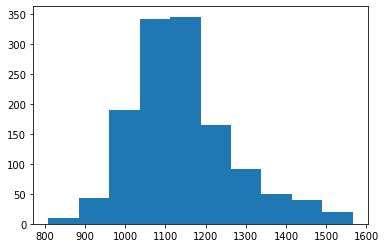

In [10]:
plt.hist(df.SAT_AVG)

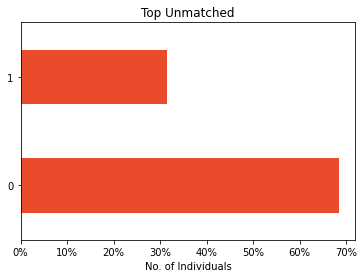

In [23]:
df['SAT_AVG_1'] = df['SAT_AVG'].fillna(0)
df['SAT_AVG_1'] = df['SAT_AVG_1'].apply(lambda x:1 if x!=0 else 0)

top_Instituition = (df['SAT_AVG_1'].value_counts()*100/4108)
ax = top_Instituition[0:2].plot(kind='barh', color ='#EA4C2B')
plt.xlabel('No. of Individuals')
plt.title('Top Unmatched')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())


In [ ]:
#now we remove the community colleges. 



In [14]:
df.count()

UNITID         4108
OPEID          4108
OPEID6         4108
INSTNM         4108
CITY           4108
               ... 
LPPPLUS_CNT    3881
LPPPLUS_AMT    3881
LPGPLUS_CNT    3881
LPGPLUS_AMT    3881
FEDSCHCD       4092
Length: 2383, dtype: int64